# Convolution Operation on Images to Add Filter

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

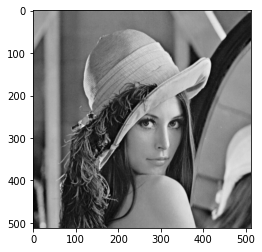

In [2]:
# Reading image in grayscale mode
img = cv2.imread('images/lena.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.show()

In [3]:
# Getting image shape, kernel size and padding size
image_width, image_height = img.shape[:2]
kernel_size = 3
padding = (kernel_size - 1) // 2

print('Image shape: ', img.shape)
print('Kernel size: ', kernel_size)
print('Padding size: ', padding)

Image shape:  (512, 512)
Kernel size:  3
Padding size:  1


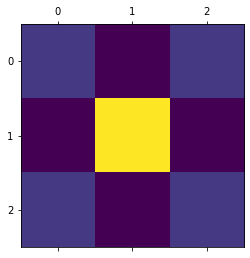

In [4]:
# Making a kernel
kernel = np.array(([0, -1, 0], [-1, 5, -1], [0, -1, 0]))

plt.matshow(kernel)
plt.show()

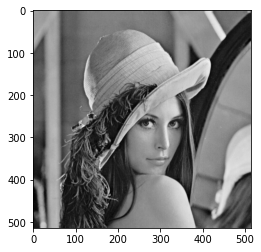

Padded image shape:  (514, 514)


In [5]:
# Making a padded image
padded_img = cv2.copyMakeBorder(img, padding, padding, padding, padding, cv2.BORDER_REPLICATE)

plt.imshow(padded_img, cmap='gray')
plt.show()

print('Padded image shape: ', padded_img.shape)

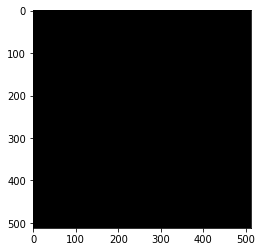

Output image shape:  (512, 512)


In [6]:
# Making an empty image for the output image with the same shape as the input image with zero values(black)
output_img = np.zeros(img.shape, dtype=np.float32)

plt.imshow(output_img, cmap='gray')
plt.show()

print('Output image shape: ', output_img.shape)

##### The convolution operation

$$
\begin{align}
\mathbf{\omega} &= \begin{bmatrix}
    0 & -1 & 0 \\
    -1 & 5 & - \\
    0 & -1 & 0
\end{bmatrix} \\
\end{align}
$$

$$
\begin{align}
\mathbf{g(x, y)} &= \mathbf{\omega} * \mathbf{f(x, y)} &= \sum_{i=0}^{2} \sum_{j=0}^{2} f(x + i, y + j) * \omega(i, j)
\end{align}
$$


Where g(x,y) is the filtered image, f(x,y) is the original image, w is the filter kernel.

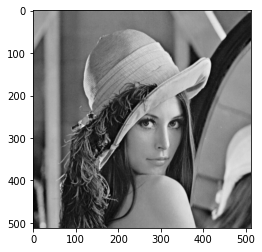

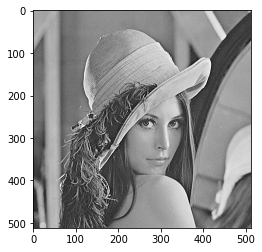

In [7]:
for x in range(padding, image_width + padding):
    for y in range(padding, image_height + padding):
        value = 0
        for i in range(-padding, padding + 1):
            for j in range(-padding, padding + 1):
                value += padded_img[x + i, y + j] * kernel[i + padding, j + padding]
        output_img[x - padding, y - padding] = value

plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(output_img, cmap='gray', vmin=0, vmax=255)
plt.show()

In [8]:
print("Maximum Intensity of the Input/Original Image: ", img.max())
print("Minimum Intensity of the Input/Original Image: ", img.min())
print("Mean Intensity of the Input/Original Image: ", img.mean())
print("Standard Deviation of the Input/Original Image: ", img.std())

print("Shape of the Input/Original image: ", img.shape)
print("Size of the Input/Original image: ", img.size)
print("Type of the Input/Original image: ", img.dtype)

Maximum Intensity of the Input/Original Image:  245
Minimum Intensity of the Input/Original Image:  39
Mean Intensity of the Input/Original Image:  132.42729568481445
Standard Deviation of the Input/Original Image:  44.90209985629212
Shape of the Input/Original image:  (512, 512)
Size of the Input/Original image:  262144
Type of the Input/Original image:  uint8


In [9]:
print("Maximum Intensity of the Output Image: ", output_img.max())
print("Minimum Intensity of the Output Image: ", output_img.min())
print("Mean Intensity of the Output Image: ", output_img.mean())
print("Standard Deviation of the Output Image: ", output_img.std())

print("Shape of the output image: ", output_img.shape)
print("Size of the output image: ", output_img.size)
print("Type of the output image: ", output_img.dtype)

Maximum Intensity of the Output Image:  396.0
Minimum Intensity of the Output Image:  -102.0
Mean Intensity of the Output Image:  132.42729
Standard Deviation of the Output Image:  51.2564
Shape of the output image:  (512, 512)
Size of the output image:  262144
Type of the output image:  float32


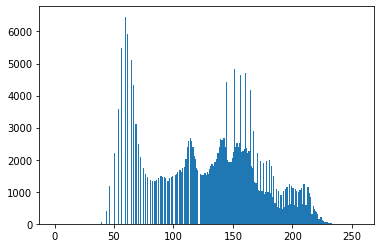

In [10]:
# Histogram of the input image
plt.hist(img.ravel(), 256, [0, 256])
plt.show()

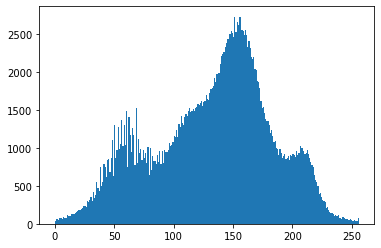

In [11]:
# Histogram of the output image
plt.hist(output_img.ravel(), 256, [0, 256])
plt.show()